<a href="https://colab.research.google.com/github/KyoungmiKwon/Bigdata_Training_at_ITwill/blob/main/Machine_Learning/ML15_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit # sigmoid

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, SGDClassifier

import pickle

# Perceptron

[인공 신경망과 딥 러닝 - SciKit-Learn](http://naver.me/GSkrHT1v)

In [ ]:
x = np.array([1,2])
w = np.array([0.1,0.2])

In [ ]:
x * w

array([0.1, 0.4])

In [ ]:
np.sum(x * w)

0.5

In [ ]:
np.dot(x,w)

0.5

## AND Gate

[Perceptron Intro](https://blog.naver.com/beadsryung/222276215850)

| $x_1$ | $x_2$ | $y$ |
|--|--|--|
|0 |0 |0 |
|1 |0 |0 |
|0 |1 |0 |
|1|1 |1 |

In [ ]:
def and_gate(x1,x2):
    w1,w2, th = 0.5,0.5,0.7
    result = x1 * w1 + x2 * w2
    if result > th :
        y = 1
    else:
        y = 0
    return y

In [ ]:
and_gate(0,0)

0

In [ ]:
and_gate(1,0)

0

In [ ]:
and_gate(0,1)

0

In [ ]:
and_gate(1,1)

1

In [ ]:
def and_gate(x1,x2):
    w1,w2, th = 0.1,0.1,0.1
    result = x1 * w1 + x2 * w2
    y = 1 if result > th else 0
    return y

AND 게이트를 만들 수 있는 가중치(w1,w2), 임계값(threshold)는 무수히 많은 조합이 있을 수 있음

In [ ]:
def and_gate2(x):
    """x는 원소가 2개인 1차원 배열. AND 논리 연산이 결과를 리턴."""
    w = np.array([0.5,0.5])
    th = 0.7
    y = 1 if np.sum(x*w) > th else 0
    return y

In [ ]:
and_gate2(np.array([0,0]))

0

In [ ]:
and_gate2(np.array([0,1]))

0

In [ ]:
and_gate2(np.array([1,0]))

0

In [ ]:
and_gate2(np.array([1,1]))

1

In [ ]:
def and_gate3(X):
    """ X는 컬럼이 2개인 2차원 배열. 즉 shape은 (-1,2). AND 논리 연산 결과를 리턴"""
    w = np.array([0.5,0.5])
    th = 0.7
    y = (np.dot(X,w)> th).astype(np.int_)
    return y


In [ ]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

In [ ]:
and_gate3(X)

array([0, 0, 0, 1])

In [ ]:
def and_gate4(X):
    """ X는 컬럼이 2개인 2차원 배열. 즉 shape은 (-1,2). AND 논리 연산 결과를 리턴"""
    w = np.array([0.5,0.5])
    b = -0.7
    result = np.dot(X,w) + b
    y = result > 0
    return y.astype(np.int_)

In [ ]:
and_gate4(X)

array([0, 0, 0, 1])

In [ ]:
X.shape

(4, 2)

In [ ]:
len(X)

4

In [ ]:
np.ones(4).shape

(4,)

In [ ]:
np.ones(4)

array([1., 1., 1., 1.])

In [ ]:
np.array([-0.7,0.5,0.5])

array([-0.7,  0.5,  0.5])

In [ ]:
a = np.c_[np.ones(4),X]
a

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [ ]:
np.dot(a,np.array([-0.7,0.5,0.5]))

array([-0.7, -0.2, -0.2,  0.3])

In [ ]:
np.dot(a,np.array([-0.7,0.5,0.5]))> 0

array([False, False, False,  True])

In [ ]:
def and_gate5(X):
    w_bias = np.array([-0.7,0.5,0.5]) # bias를 포함한 weight:(bias,w1,w2)
    n = len(X)
    X_bias = np.c_[np.ones(n),X] # bias에는 1이 곱해짐
    result = np.dot(X_bias, w_bias) # X_bias @ w_bias
    y = result > 0
    return y.astype(np.int_)

In [ ]:
and_gate5(X)

array([0, 0, 0, 1])

# NAND Gate

| $x_1$ | $x_2$ | $y$ |
|--|--|--|
|0 |0 |1 |
|1 |0 |1 |
|0 |1 |1 |
|1|1 |0 |

In [ ]:
def nand_gate(X):
    w_bias = np.array([0.7,-0.5,-0.5]) # bias를 포함한 weight:(bias,w1,w2)
    n = len(X)
    X_bias = np.c_[np.ones(n),X] # bias에는 1이 곱해짐
    result = np.dot(X_bias, w_bias) # X_bias @ w_bias
    y = result > 0
    return y.astype(np.int_)

In [ ]:
nand_gate(X)

array([1, 1, 1, 0])

# OR Gate

| $x_1$ | $x_2$ | $y$ |
|--|--|--|
|0 |0 |0 |
|1 |0 |1|
|0 |1 |1 |
|1|1 |1|

In [ ]:
def or_gate(X):
    w_bias = np.array([-0.4,0.5,0.5]) # bias를 포함한 weight:(bias,w1,w2)
    n = len(X)
    X_bias = np.c_[np.ones(n),X] # bias에는 1이 곱해짐
    result = np.dot(X_bias, w_bias) # X_bias @ w_bias
    y = result > 0
    return y.astype(np.int_)

In [ ]:
or_gate(X)

array([0, 1, 1, 1])

# XOR(Exclusive)

| $x_1$ | $x_2$ | NAND ($y_1$)|OR($y_1$)|XOR($z$)
|--|--|--|--|--|
|0 |0 |1|0|0|
|1 |0 |1 |1|1|
|0 |1 |1 |1|1|
|1|1 |0 |1|0|

In [ ]:
np.dot(a,np.array([-0.4,0.5,0.5]))>0

array([False,  True,  True,  True])

In [ ]:
y1 = nand_gate(X)
y2 = or_gate(X)
Y = np.c_[y1,y2]
Y

array([[1, 0],
       [1, 1],
       [1, 1],
       [0, 1]])

In [ ]:
def xor_gate(X):
    y1 = nand_gate(X)
    y2 = or_gate(X)
    Y = np.c_[y1,y2]
    z = and_gate5(Y)
    return z

In [ ]:
xor_gate(X)

array([0, 1, 1, 0])

# Activation Function(활성화 함수)

활성화 함수를 사용하는 이유:
1. 출력층에서 출력값을 특정 값 (예:0,1) 또는 특정 값의 범위(예: 0 ~ 1)로 제한하기 위해서
2. 여러 층을 쌓는 다층 신경망(multi-layer neural network, deep neural network)에서 활성화 함수를 사용하지 않으면 단일 신경망과 동일해 지기 때문에.

## Step function(계산 함수)

In [ ]:
def step(x):
    # y = 1 if x>0 else 0
    y = x > 0
    return y.astype(np.int)

In [ ]:
x = np.arange(-5,5,0.001)
y = step(x)

In [ ]:
print(x[:10])
print(y[:10])

[-5.    -4.999 -4.998 -4.997 -4.996 -4.995 -4.994 -4.993 -4.992 -4.991]
[0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(x[-10:])
print(y[-10:])

[4.99  4.991 4.992 4.993 4.994 4.995 4.996 4.997 4.998 4.999]
[1 1 1 1 1 1 1 1 1 1]


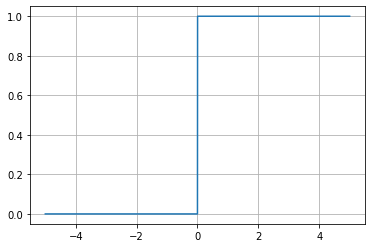

In [ ]:
plt.plot(x,y)
plt.grid()
plt.show()

In [3]:
def plot_activation_fn(activation):
    """활성화 함수 activation을 파라미터로 전달 받아서, 활성화 함수의 그래프를 그려주는 함수"""
    x = np.arange(-5,5,0.0001) # 그래프를 그릴 x좌표들
    y = activation(x) # activation 함수의 리턴값(출력값)
    plt.plot(x,y)
    plt.grid()
    plt.show()



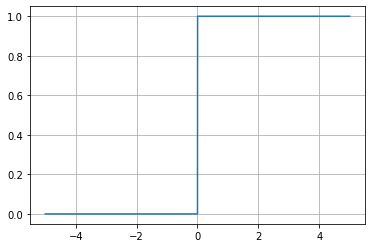

In [ ]:
plot_activation_fn(activation=step)

## Signoid 함수

In [ ]:
def sigmoid(x):
    y = 1 / (1+ np.exp(-x))
    return y

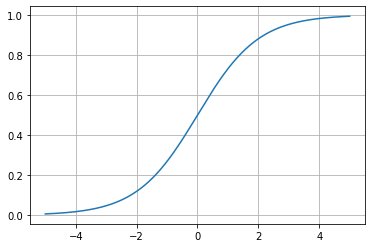

In [ ]:
plot_activation_fn(activation = sigmoid)

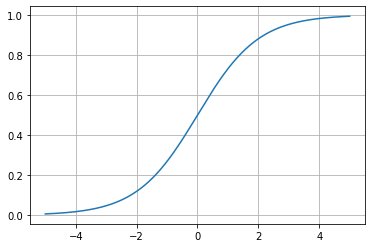

In [ ]:
plot_activation_fn(expit)

## tanh(Hyperbolic Tangent)

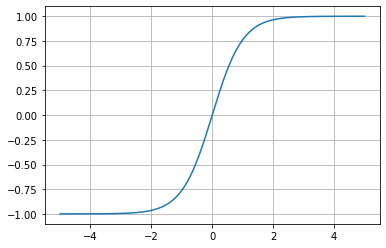

In [ ]:
plot_activation_fn(np.tanh)

## ReLU (Rectified Linear Unit) 함수

In [ ]:
def plot_activation_fn(activation):
    """활성화 함수 activation을 파라미터로 전달 받아서, 활성화 함수의 그래프를 그려주는 함수"""
    x = np.arange(-5,5,0.0001) # 그래프를 그릴 x좌표들
    y = activation(x) # activation 함수의 리턴값(출력값)
    plt.plot(x,y)
    plt.grid()
    plt.show()

In [44]:
def relu(x):

    if x < 0:
        y = 0
    else:
        y = x * 1

    return y

In [36]:
for i in np.arange(-1,1,0.1):
    print(relu(i))

0
0
0
0
0
0
0
0
0
0
0
0.09999999999999964
0.19999999999999973
0.2999999999999998
0.3999999999999997
0.49999999999999956
0.5999999999999996
0.6999999999999997
0.7999999999999996
0.8999999999999995


In [45]:
plot_activation_fn(activation=relu)

ValueError: ignored

In [ ]:
def relu(x):
    y = np.maximum(x,0)
    return y

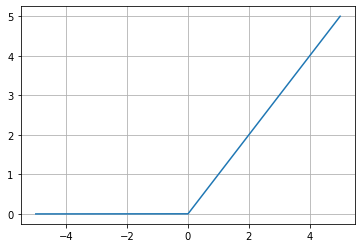

In [ ]:
plot_activation_fn(activation=relu)

# Artificial Neuron(인공뉴런) 응용

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
X.shape,y.shape

((150, 4), (150,))

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

문제를 간단히 하기 위해서, 
* iris의 특성들 중에서 꽃잎 길이/너비만 선택하고
* setosa (0) / non-setosa (1) 이진 분류

In [ ]:
data = X[:, 2:4]
data[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [ ]:
target = (y != 0).astype(np.int_)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

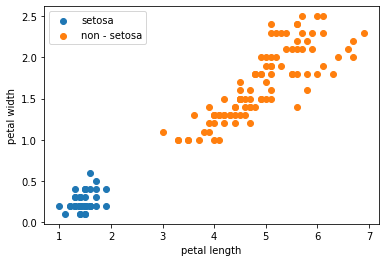

In [ ]:
plt.scatter(data[target == 0, 0],data[target == 0, 1], label='setosa')
plt.scatter(data[target == 1, 0],data[target == 1, 1], label='non - setosa')

plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [ ]:
b = -2.0 # bias
w = np.array([0.7,1.2]) # weight

In [ ]:
z = np.dot(data,w) + b
z

array([-0.78, -0.78, -0.85, -0.71, -0.78, -0.33, -0.66, -0.71, -0.78,
       -0.83, -0.71, -0.64, -0.9 , -1.11, -0.92, -0.47, -0.61, -0.66,
       -0.45, -0.59, -0.57, -0.47, -1.06, -0.21, -0.43, -0.64, -0.4 ,
       -0.71, -0.78, -0.64, -0.64, -0.47, -0.83, -0.78, -0.71, -0.92,
       -0.85, -0.9 , -0.85, -0.71, -0.73, -0.73, -0.85, -0.16, -0.19,
       -0.66, -0.64, -0.78, -0.71, -0.78,  2.97,  2.95,  3.23,  2.36,
        3.02,  2.71,  3.21,  1.51,  2.78,  2.41,  1.65,  2.74,  2.  ,
        2.97,  2.08,  2.76,  2.95,  2.07,  2.95,  2.05,  3.52,  2.36,
        3.23,  2.73,  2.57,  2.76,  3.04,  3.54,  2.95,  1.65,  1.98,
        1.79,  2.17,  3.49,  2.95,  3.07,  3.09,  2.64,  2.43,  2.36,
        2.52,  2.9 ,  2.24,  1.51,  2.5 ,  2.38,  2.5 ,  2.57,  1.42,
        2.43,  5.2 ,  3.85,  4.65,  4.08,  4.7 ,  5.14,  3.19,  4.57,
        4.22,  5.27,  3.97,  3.99,  4.37,  3.9 ,  4.45,  4.47,  4.01,
        5.33,  5.59,  3.3 ,  4.75,  3.83,  5.09,  3.59,  4.51,  4.36,
        3.52,  3.59,

In [ ]:
prd = step(z)
prd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.mean(target == prd)

1.0

In [ ]:
class SimplePerceptron:
    def fit(self, X, y):
        self.intercept_= np.array([-2.0])
        self.coef_=np.array([0.7,0.2])

    def forward(self,X):
        z = np.dot(X, self.coef_) + self.intercept_
        return z

    def activation(self,x) :
        y = x > 0
        return y.astype(np.int_)

    def predict(self,X):
        z = self.forward(X)
        y = self.activation(z)
        return y
    
    def score(self,X,y):
        y_pred = self.predict(X)
        acc = np.mean(y == y_pred)
        return acc

In [ ]:
neuron = SimplePerceptron() # 뉴런 객체 생성

In [ ]:
neuron.fit(data,target) # 모델훈련

In [ ]:
neuron.coef_, neuron.intercept_ # 선형 방정식이 계수들을 찾을 수 있음.

(array([0.7, 0.2]), array([-2.]))

In [ ]:
neuron.forward(data)

array([-0.98, -0.98, -1.05, -0.91, -0.98, -0.73, -0.96, -0.91, -0.98,
       -0.93, -0.91, -0.84, -1.  , -1.21, -1.12, -0.87, -1.01, -0.96,
       -0.75, -0.89, -0.77, -0.87, -1.26, -0.71, -0.63, -0.84, -0.8 ,
       -0.91, -0.98, -0.84, -0.84, -0.87, -0.93, -0.98, -0.91, -1.12,
       -1.05, -1.  , -1.05, -0.91, -1.03, -1.03, -1.05, -0.76, -0.59,
       -0.96, -0.84, -0.98, -0.91, -0.98,  1.57,  1.45,  1.73,  1.06,
        1.52,  1.41,  1.61,  0.51,  1.48,  1.01,  0.65,  1.24,  1.  ,
        1.57,  0.78,  1.36,  1.45,  1.07,  1.45,  0.95,  1.72,  1.06,
        1.73,  1.53,  1.27,  1.36,  1.64,  1.84,  1.45,  0.65,  0.88,
        0.79,  0.97,  1.89,  1.45,  1.47,  1.59,  1.34,  1.13,  1.06,
        1.32,  1.5 ,  1.04,  0.51,  1.2 ,  1.18,  1.2 ,  1.27,  0.32,
        1.13,  2.7 ,  1.95,  2.55,  2.28,  2.5 ,  3.04,  1.49,  2.77,
        2.42,  2.77,  1.97,  2.09,  2.27,  1.9 ,  2.05,  2.17,  2.21,
        3.13,  3.29,  1.8 ,  2.45,  1.83,  3.09,  1.79,  2.41,  2.56,
        1.72,  1.79,

In [ ]:
neuron.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
neuron.score(data,target)

1.0

## sklearn.linear_model.Perceptron

In [ ]:
per = Perceptron(random_state=42) # 모델생성

In [ ]:
per.fit(data,target) # 모델훈련

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
per.predict(X=data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## 활성화 함수가 sigmoid인 Neuron

In [ ]:
class SimpleNeuron:
    
    def fit(self,X,y):
        self.intercept_ = np.array([-35.6])
        self.coef_=np.array([11.8,17.0])

    def forward(self,X):
        z = np.dot(X, self.coef_) + self.intercept_
        return z
    
    def activation(self,x) :
        # y = 1 / (1+ np.exp(-x))
        y = expit(x)
        return y

    def predict_proba(self,X):
        z = self.forward(X)
        y = self.activation(z)
        probas = np.c_[1- y, y]
        return probas
    
    def predict(self,X):
        # y = self.predict_proba(X) > 0.5
        # return y.astype(np.int_)
        probas = self.predict_proba(X)
        prd = np.argmax(probas, axis = 1)
        return prd

    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.mean(y == y_pred)
        return acc

In [ ]:
neu = SimpleNeuron()

In [ ]:
neu.fit(data,target)

In [ ]:
neu.predict_proba(data)[:5],neu.predict_proba(data)[-5:]

(array([[9.99999845e-01, 1.54975290e-07],
        [9.99999845e-01, 1.54975290e-07],
        [9.99999952e-01, 4.76206166e-08],
        [9.99999496e-01, 5.04347408e-07],
        [9.99999845e-01, 1.54975290e-07]]), array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [ ]:
neu.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
neu.score(data,target)

1.0

## sklearn.linear_module.SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(loss='log',n_jobs = -1, random_state=42)

In [ ]:
sgd_clf.fit(data, target)
sgd_clf.intercept_,sgd_clf.coef_

(array([-33.65502003]), array([[9.29310825, 9.5046378 ]]))

In [ ]:
probas = sgd_clf.predict_proba(data)
probas [:5]

array([[9.99999993e-01, 7.23930287e-09],
       [9.99999993e-01, 7.23930287e-09],
       [9.99999997e-01, 2.85826298e-09],
       [9.99999982e-01, 1.83354387e-08],
       [9.99999993e-01, 7.23930287e-09]])

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Lab_ML/iris2_model_weights.pkl',mode='rb') as f:
    w = pickle.load(f)

In [ ]:
w.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [ ]:
# 입력층(input layer)에서 은닉층(hidden layer)로 들어갈 때 필요한 가중치
w['W1'].shape # n_neurons,n_output

(2, 10)

In [ ]:
# 입력층(input layer)에서 은닉층(hidden layer)로 들어갈 때 필요한 편향
w['b1'].shape # n_neurons

(10,)

In [ ]:
# 은닉층에서 출력층(output layer)로 들어갈 때 필요한 가중치
w['W2'].shape

(10, 1)

In [ ]:
# 은닉층에서 출력층(output layer)로 들어갈 때 필요한 편향
w['b2'].shape

(1,)

In [ ]:
# iris data가 신경망의 모든 층을 통과한 후, 계산된 결과 출력
h = np.dot(data,w['W1']) + w['b1']
h_1 = expit(h)
o = np.dot(h_1,w['W2']) + w['b2']
o_1 = expit(o)
o_1[:5]

array([[0.4881909 ],
       [0.4881909 ],
       [0.48864567],
       [0.48775497],
       [0.4881909 ]])

In [ ]:
probas = np.c_[1- o_1, o_1]
probas[:5]

array([[0.5118091 , 0.4881909 ],
       [0.5118091 , 0.4881909 ],
       [0.51135433, 0.48864567],
       [0.51224503, 0.48775497],
       [0.5118091 , 0.4881909 ]])

In [ ]:
prd = np.argmax(probas, axis = 1)
prd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])